Hypothèses testées et résultats :

1. Les femmes sont plus nombreuses à résilier que les hommes<br>
✅ Test du Khi² → p-value ≈ 0 → Nous avons suffisamment d’évidence pour rejeter H₀<br>
📌 Le sexe est un facteur significativement associé à la résiliation.

2. Les clients ayant 1 seul produit résilient plus que ceux en ayant 2<br>
✅ Test du Khi² → p-value ≈ 0 → H₀ rejetée<br>
📌 Posséder peu de produits est corrélé à un taux de churn plus élevé.

3. Les clients allemands résilient plus que les Français et Espagnols<br>
✅ Test du Khi² sur la variable Geography → p-value ≈ 0 → H₀ rejetée<br>
📌 Le pays d’origine influence significativement le comportement de résiliation.

4. Les clients actifs résilient plus que les clients inactifs<br>
✅ Test du Khi² → p-value ≈ 0 → H₀ rejetée<br>
📌 À l’inverse de ce qu’on pourrait penser, l'activité est liée à un taux de churn plus élevé dans cet échantillon.

5. Les clients avec un solde élevé résilient plus souvent<br>
✅ Test de student à 2 échantillons indépendants → p-value ≈ 0 → H₀ rejetée<br>
📌 Un solde plus élevé est associé à un risque de résiliation accru.

6. Les clients âgés de 44 ans et plus résilient plus souvent<br>
✅ Test de student à 2 échantillons indépendants → p-value ≈ 0 → H₀ rejetée<br>
📌 L’âge est un facteur significativement lié à la résiliation.

In [158]:
### Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [159]:
df_train = pd.read_csv("train_data.csv")
df_train = df_train.drop_duplicates(subset="CustomerId", keep="first")
df_train.reset_index(drop=True)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
22013,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
22014,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
22015,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


# 1. Les femmes sont plus nombreuses à résilier que les hommes

Test chi2 contingency

HO : "Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre"

In [160]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Gender"])
contingency_table

Gender,Female,Male
Exited,,
0,7025,10377
1,2642,1973


In [161]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(421.2766703991938), pvalue=np.float64(1.2869594072393909e-93), dof=1, expected_freq=array([[7640.69282827, 9761.30717173],
       [2026.30717173, 2588.69282827]]))

In [162]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=df_train["Gender"].sort_values().unique(),
    index=df_train["Exited"].sort_values().unique(),
).round()

,Female,Male
0,7641.0,9761.0
1,2026.0,2589.0


<Axes: xlabel='Gender', ylabel='Exited'>

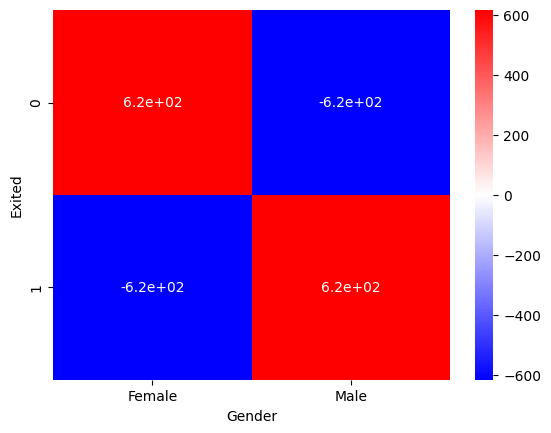

In [163]:
expected = chi2_contingency(contingency_table).expected_freq

expected_df = pd.DataFrame(expected, 
                           index=contingency_table.index, 
                           columns=contingency_table.columns
                           ).round()

diff = expected_df - contingency_table


sns.heatmap(diff, annot=True, cmap="bwr")

In [164]:
print("HO : 'Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

HO : 'Le nombre de clients qui résilient (Exited) et le sexe (Gender) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


👉 Le test du χ² (p-value ≈ 0) rejette l’hypothèse d’indépendance entre le sexe et la résiliation.

On observe une **sur-représentation des femmes** parmi les clients qui résilient, et une **sur-représentation des hommes** parmi ceux qui restent.

Ainsi, **le genre a une influence significative sur le churn**.


# 2. Les clients ayant 1 produit sont plus nombreuses à résilier que ceux en ayant 2

Test chi2 contingency

H0 : "Le nombre de produit détenu par les clients (NumOfProducts) et le nombre de résiliation (Exited) <br>
sont 2 variables indépendantes l'une de l'autre."

In [165]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])
contingency_table

NumOfProducts,1,2,3,4
Exited,,,,
0,6978,10374,39,11
1,3505,679,376,55


In [166]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(3819.283728664408), pvalue=np.float64(0.0), dof=3, expected_freq=array([[8285.65045192, 8736.17232139,  328.01153654,   52.16569015],
       [2197.34954808, 2316.82767861,   86.98846346,   13.83430985]]))

In [167]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
    ).round()

NumOfProducts,1,2,3,4
Exited,,,,
0,8286.0,8736.0,328.0,52.0
1,2197.0,2317.0,87.0,14.0


<Axes: xlabel='NumOfProducts', ylabel='Exited'>

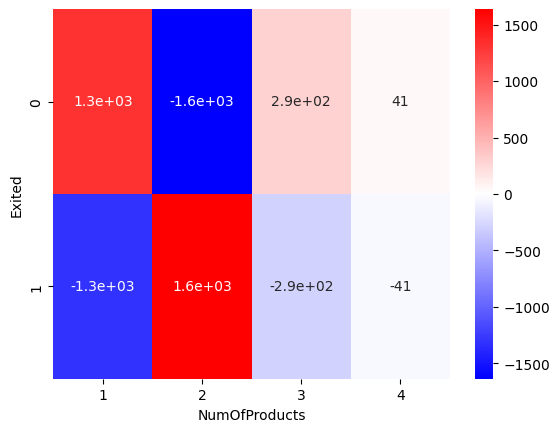

In [168]:
diff = expected - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [169]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 3. Les clients allemands sont plus nombreux à résilier que les clients Français et Espagnol

Test chi2 contingency

H0 : "Le nombre de clients ayant résilié (Exited) et le pays d'origine (Geography)<br> 
sont 2 variables indépendantes l'une de l'autre." 

In [170]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Geography"])
contingency_table

Geography,France,Germany,Spain
Exited,,,
0,10300,3041,4061
1,2009,1756,850


In [171]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(908.210264551562), pvalue=np.float64(6.090414470991611e-198), dof=2, expected_freq=array([[9728.9012127, 3791.4972067, 3881.6015806],
       [2580.0987873, 1005.5027933, 1029.3984194]]))

In [172]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

Geography,France,Germany,Spain
Exited,,,
0,9729.0,3791.0,3882.0
1,2580.0,1006.0,1029.0


<Axes: xlabel='Geography', ylabel='Exited'>

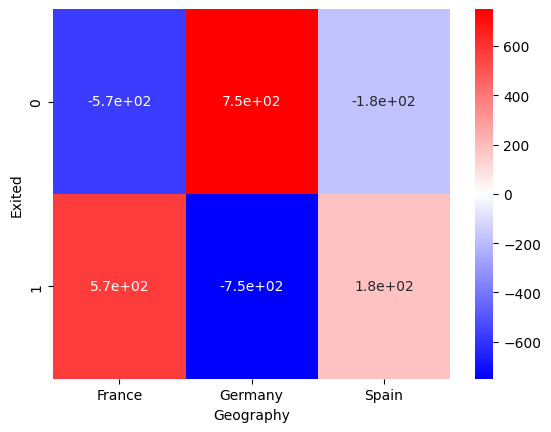

In [173]:
expected = chi2_contingency(contingency_table).expected_freq

diff = pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round() - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [174]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et la géographie (Geography) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et la géographie (Geography) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 4. Les clients actifs sont plus nombreux à résilier que les clients inactif

Test chi2 contingency

H0 : "Le nombre de clients actif (IsActiveMember) et le nombre de clients qui résilient (Exited) sont 2 variables<br> 
indépendantes l'une de l'autre"

In [175]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])
contingency_table

IsActiveMember,0.0,1.0
Exited,,
0,7875,9527
1,3190,1425


In [176]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(830.3361250534012), pvalue=np.float64(1.369597668812238e-182), dof=1, expected_freq=array([[8745.65699232, 8656.34300768],
       [2319.34300768, 2295.65699232]]))

In [177]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

IsActiveMember,0.0,1.0
Exited,,
0,8746.0,8656.0
1,2319.0,2296.0


In [178]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et le statut d'adhésion (IsActiveMember) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et le statut d'adhésion (IsActiveMember) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 4.1 Test de Tenure avec Exited

In [179]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Tenure"])
contingency_table

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,489,1775,1908,1762,1817,1810,1620,1877,1931,1784,629
1,168,498,493,517,509,461,410,423,480,475,181


In [180]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(28.24716529860588), pvalue=np.float64(0.0016478192553174525), dof=10, expected_freq=array([[ 519.28573375, 1796.55475315, 1897.72457646, 1801.29708861,
        1838.44538311, 1794.97397466, 1604.49016669, 1817.89526275,
        1905.62846891, 1785.48930372,  640.21528819],
       [ 137.71426625,  476.44524685,  503.27542354,  477.70291139,
         487.55461689,  476.02602534,  425.50983331,  482.10473725,
         505.37153109,  473.51069628,  169.78471181]]))

In [181]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et leurs ancienneté dans la banque (Tenure) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et leurs ancienneté dans la banque (Tenure) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


## 4.3 HasCrCard vs Exited

In [182]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["HasCrCard"])
contingency_table

HasCrCard,0.0,1.0
Exited,,
0,4261,13141
1,1283,3332


In [183]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(21.10037912518738), pvalue=np.float64(4.358418871326444e-06), dof=1, expected_freq=array([[ 4381.91797248, 13020.08202752],
       [ 1162.08202752,  3452.91797248]]))

In [184]:
print("H0 : 'Le nombre de clients qui résilient (Exited) et qu'ils possèdent une carte de crédit (HasCrCard) sont 2 variables indépendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Le nombre de clients qui résilient (Exited) et qu'ils possèdent une carte de crédit (HasCrCard) sont 2 variables indépendantes l'une de l'autre'
Nous avons suffisament d'évidence pour rejeter H0


# 5. Les clients ayant un solde élevée sont plus nombreux à résilier (Attention avec médiane à 0 FR et ES)

Test de student

H0 : "Les clients qui ont résilié ont en moyenne un solde égal aux autres." 

In [185]:
df_train.groupby("Exited")["Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,55645.143723,62880.812101,0.0,0.0,0.00,120107.5275,250898.09
1,4615.0,73019.218566,62308.954294,0.0,0.0,101979.16,125823.7750,209767.31


- Les variances sont sensiblement identiques
- Les données sont indépendantes
- Il y a plus de 30 lignes de données pour chaque groupe (TCL)

-"Les données sont indépendantes car chaque observation (client) est distincte et ne dépend pas des autres. Il n'y a pas de duplication ou de lien entre les clients dans le dataset."

In [186]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Balance"], df_NoExited["Balance"])

TtestResult(statistic=np.float64(16.719199871824134), pvalue=np.float64(2.3042195082418613e-62), df=np.float64(22015.0))

In [187]:
print("H0 : 'Les clients qui ont résilié ont un solde moyen identique à celui des clients qui n’ont pas résilié.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Balance"], df_NoExited["Balance"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui ont résilié ont un solde moyen identique à celui des clients qui n’ont pas résilié.'
Nous avons suffisament d'évidence pour rejeter H0


# 6. Les clients de 44 ans et plus sont plus nombreux à résilier

Test de student

H0 : "Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas."

In [188]:
df_train.groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,36.527034,8.066535,18.0,31.0,36.0,40.0,92.0
1,4615.0,43.989166,8.939078,18.0,38.0,44.0,50.0,74.0


In [189]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Age"], df_NoExited["Age"])

TtestResult(statistic=np.float64(54.58138057115054), pvalue=np.float64(0.0), df=np.float64(22015.0))

In [190]:
print("H0 : 'Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Age"], df_NoExited["Age"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui résilient ont le même âge moyen que ceux qui ne résilient pas.'
Nous avons suffisament d'évidence pour rejeter H0


## 7. CreditScore et Exited

In [191]:
df_train.groupby("Exited")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,658.176072,79.553669,350.0,598.0,662.0,711.0,850.0
1,4615.0,652.180715,80.372660,350.0,593.0,651.0,707.0,850.0


In [192]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["CreditScore"], df_NoExited["CreditScore"])

TtestResult(statistic=np.float64(-4.541730254770524), pvalue=np.float64(5.609027497020001e-06), df=np.float64(22015.0))

In [193]:
print("H0 : 'Les clients qui résilient ont le même Score de crédit que ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["CreditScore"], df_NoExited["CreditScore"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui résilient ont le même Score de crédit que ceux qui ne résilient pas.'
Nous avons suffisament d'évidence pour rejeter H0


# 8. EstimatedSalary et Exited

In [194]:
df_train.groupby("Exited")["EstimatedSalary"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,113300.804402,49321.685000,106.67,76624.0325,118915.69,153894.825,199992.48
1,4615.0,115286.527439,49133.820714,468.67,79489.1200,121061.89,157834.460,199992.48


In [195]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["EstimatedSalary"], df_NoExited["EstimatedSalary"])

TtestResult(statistic=np.float64(2.4335117355697884), pvalue=np.float64(0.014961052459226413), df=np.float64(22015.0))

In [196]:
print("H0 : 'Les clients qui résilient ont le même EstimatedSalary que ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["EstimatedSalary"], df_NoExited["EstimatedSalary"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui résilient ont le même EstimatedSalary que ceux qui ne résilient pas.'
Nous avons suffisament d'évidence pour rejeter H0


## 9. CustomerId et Exited

In [197]:
df_train.groupby("Exited")["CustomerId"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,1.569366e+07,72015.228632,15565701.0,15633230.0,15691800.0,15758540.25,15815690.0
1,4615.0,1.569175e+07,72732.620121,15565706.0,15631605.0,15690164.0,15757551.00,15815660.0


In [198]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["CustomerId"], df_NoExited["CustomerId"])

TtestResult(statistic=np.float64(-1.605651496889616), pvalue=np.float64(0.10836484666400516), df=np.float64(22015.0))

In [199]:
print("H0 : 'Les clients qui résilient ont le même CustomerId que ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["CustomerId"], df_NoExited["CustomerId"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Les clients qui résilient ont le même CustomerId que ceux qui ne résilient pas.'
Nous n'avons pas suffisament d'évidence pour rejeter H0


# 10. ID et Exited

In [200]:
df_train.groupby("Exited")["ID"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,17402.0,83093.668774,47729.700144,9.0,41645.75,83695.0,124532.5,165031.0
1,4615.0,83694.250271,47483.792691,19.0,42312.00,84597.0,124401.0,165012.0


In [201]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["ID"], df_NoExited["ID"])

TtestResult(statistic=np.float64(0.7607778365421235), pvalue=np.float64(0.4467979226697284), df=np.float64(22015.0))

In [202]:
print("H0 : 'Il n'y a pas de différence significative entre les moyennes des ID des clients qui résilient et ceux qui ne résilient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["ID"], df_NoExited["ID"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'évidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'évidence pour rejeter H0")

H0 : 'Il n'y a pas de différence significative entre les moyennes des ID des clients qui résilient et ceux qui ne résilient pas.'
Nous n'avons pas suffisament d'évidence pour rejeter H0
